
# healpy tutorial

See the Jupyter Notebook version of this tutorial at https://github.com/healpy/healpy/blob/master/doc/healpy_tutorial.ipynb

See a executed version of the notebook with embedded plots at https://gist.github.com/zonca/9c114608e0903a3b8ea0bfe41c96f255

Choose the inline backend of maptlotlib to display the plots inside the Jupyter Notebook

Выберите встроенный бэкэнд maptlotlib, чтобы отобразить графики внутри Jupyter Notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

# NSIDE and ordering
Maps are simply numpy arrays, where each array element refers to a location in the sky as defined by the Healpix pixelization schemes (see the healpix website).

Карты - это просто многочисленные массивы, где каждый элемент массива относится к местоположению в небе, как определено схемами пикселизации Healpix (см. Веб-сайт healpix).

Note: Running the code below in a regular Python session will not display the maps; it's recommended to use an IPython shell or a Jupyter notebook.

Примечание. Выполнение приведенного ниже кода в обычном сеансе Python не приведет к отображению карт; рекомендуется использовать оболочку IPython или блокнот Jupyter.

The resolution of the map is defined by the NSIDE parameter, which is generally a power of 2.

Разрешение карты определяется параметром NSIDE, который обычно равен степени 2.

In [24]:
NSIDE = 8
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 8 is 7.3 deg


The function healpy.pixelfunc.nside2npix gives the number of pixels NPIX of the map:

Функция healpy.pixelfunc.nside2npix дает количество пикселей NPIX карты:

In [25]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

768


The same pixels in the map can be ordered in 2 ways, either RING, where they are numbered in the array in horizontal rings starting from the North pole:

Одни и те же пиксели на карте можно упорядочить двумя способами: либо КОЛЬЦО, где они нумеруются в массиве горизонтальными кольцами, начиная с северного полюса:

/home/agrippina/snap/jupyter/common/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/agrippina/snap/jupyter/common/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/agrippina/snap/jupyter/common/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


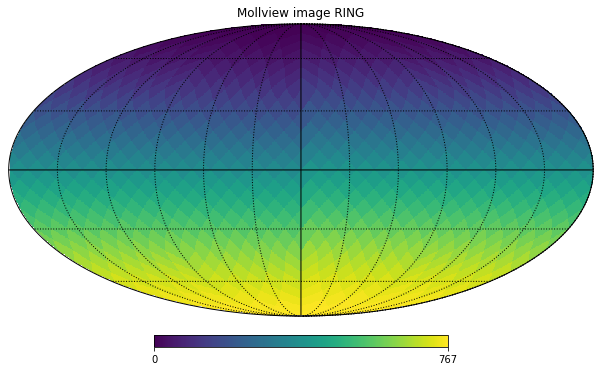

In [26]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

The standard coordinates are the colatitude $\theta$, $0$ at the North Pole, $\pi/2$ at the equator and $\pi$ at the South Pole and the longitude $\phi$ between $0$ and $2\pi$ eastward, in a Mollview projection, $\phi=0$ is at the center and increases eastward toward the left of the map.

Стандартными координатами являются широта $ \ theta $, $ 0 $ на Северном полюсе, $ \ pi / 2 $ на экваторе и $ \ pi $ на Южном полюсе и долгота $ \ phi $ между $ 0 $ и $ 2 \ pi. $ eastward, в проекции Mollview, $ \ phi = 0 $ находится в центре и увеличивается к востоку к левому краю карты.

We can also use vectors to represent coordinates, for example vec is the normalized vector that points to $\theta=\pi/2, \phi=3/4\pi$:

Мы также можем использовать векторы для представления координат,
например vec - это нормализованный вектор, который указывает на $ \ theta = \ pi / 2, \ phi = 3/4 \ pi $:

In [27]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


We can find the indices of all the pixels within $10$ degrees of that point and then change the value of the map at those indices:

We can find the indices of all the pixels within $10$ degrees of that point and then change the value of the map at those indices:

In [28]:
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(10))

In [29]:
#NPIX = hp.nside2npix(32)

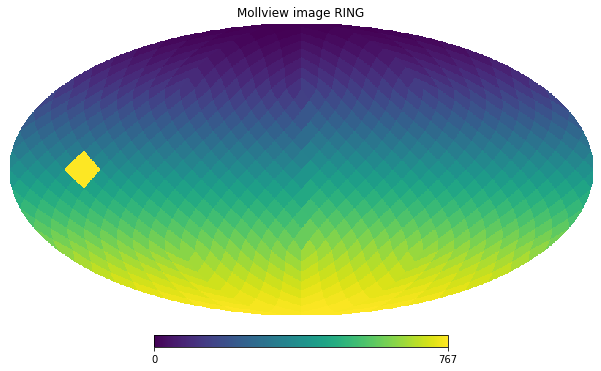

In [30]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

We can retrieve colatitude and longitude of each pixel using pix2ang, in this case we notice that the first 4 pixels cover the North Pole with pixel centers just ~$1.5$ degrees South of the Pole all at the same latitude. The fifth pixel is already part of another ring of pixels.

Мы можем получить широту и долготу каждого пикселя с помощью pix2ang, в этом случае мы замечаем, что первые 4 пикселя покрывают Северный полюс с центрами пикселей всего в ~ 1,5 $ градуса к югу от полюса на одной и той же широте. Пятый пиксель уже является частью другого кольца пикселей.

In [31]:
theta, phi = np.degrees(hp.pix2ang(nside=NSIDE, ipix=[0, 1, 2, 3, 4]))

In [32]:
theta

array([ 5.85026706,  5.85026706,  5.85026706,  5.85026706, 11.71585239])

In [33]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

The RING ordering is necessary for the Spherical Harmonics transforms, the other option is NESTED ordering which is very efficient for map domain operations because scaling up and down maps is achieved just multiplying and rounding pixel indices. See below how pixel are ordered in the NESTED scheme, notice the structure of the 12 HEALPix base pixels (NSIDE 1):
    
Порядок RING необходим для преобразований сферических гармоник, другой вариант - это порядок NESTED, который очень эффективен для операций домена карты, поскольку масштабирование карт вверх и вниз достигается простым умножением и округлением индексов пикселей. Смотрите ниже, как пиксели упорядочены в схеме NESTED,
обратите внимание на структуру 12 базовых пикселей HEALPix (NSIDE 1):

In [34]:
#NPIX = hp.nside2npix(NSIDE)

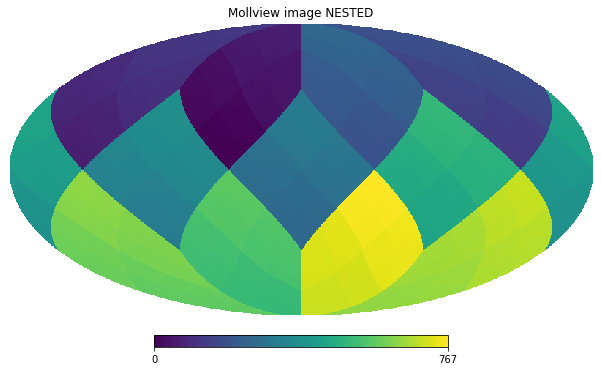

In [36]:
m = np.arange(NPIX)
hp.mollview(m, nest=True, title="Mollview image NESTED")

All healpy routines assume RING ordering, in fact as soon as you read a map with read_map, even if it was stored as NESTED, it is transformed to RING. However, you can work in NESTED ordering passing the nest=True argument to most healpy routines.

Все процедуры healpy предполагают упорядочение RING, фактически, как только вы читаете карту с read_map, даже если она была сохранена как NESTED, она преобразуется в RING. Однако вы можете работать в порядке NESTED, передавая аргумент nest = True большинству программ healpy.


# Reading and writing maps to file
For the following section, it is required to download larger maps by executing from the terminal the bash script healpy_get_wmap_maps.sh which should be available in your path.

Для следующего раздела необходимо загрузить карты большего размера, выполнив из терминала сценарий bash healpy_get_wmap_maps.sh, который должен быть доступен на вашем пути.

This will download the higher resolution WMAP data into the current directory.

Это загрузит данные WMAP с более высоким разрешением в текущий каталог.

In [38]:
#healpy_get_wmap_maps.sh
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

By default, input maps are converted to RING ordering, if they are in NESTED ordering. You can otherwise specify nest=True to retrieve a map is NESTED ordering, or nest=None to keep the ordering unchanged.

По умолчанию входные карты преобразуются в порядок RING, если они находятся в порядке NESTED. В противном случае вы можете указать nest = True, чтобы получить карту с NESTED ordering, или nest = None, чтобы сохранить порядок без изменений.


By default, read_map loads the first column, for reading other columns you can specify the field keyword.

По умолчанию read_map загружает первый столбец, для чтения других столбцов вы можете указать ключевое слово field.


write_map writes a map to disk in FITS format, if the input map is a list of 3 maps, they are written to a single file as I,Q,U polarization components:

write_map записывает карту на диск в формате FITS, если входная карта представляет собой список из 3 карт, они записываются в один файл как компоненты поляризации I, Q, U:

In [40]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

# Visualization
As shown above, mollweide projection with mollview is the most common visualization tool for HEALPIX maps. It also supports coordinate transformation, coord does Galactic to ecliptic coordinate transformation, norm='hist' sets a histogram equalized color scale and xsize increases the size of the image. graticule adds meridians and parallels.

Как показано выше, проекция mollweide с mollview является наиболее распространенным инструментом визуализации для карт HEALPIX. Он также поддерживает преобразование координат, Coordinate выполняет преобразование галактических координат в эклиптические, norm = 'hist' устанавливает цветовую шкалу с выравниванием гистограммы, а xsize увеличивает размер изображения. сетка добавляет меридианы и параллели.

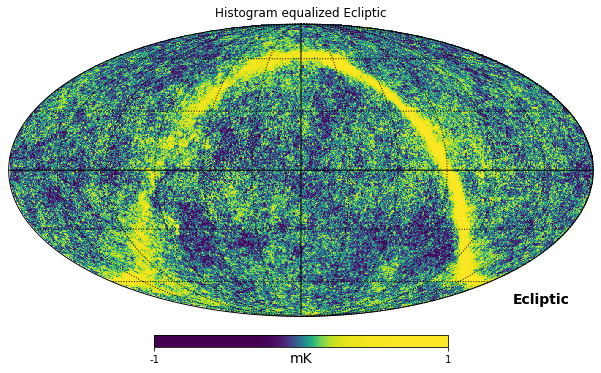

In [16]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

gnomview instead provides gnomonic projection around a position specified by rot, for example you can plot a projection of the galactic center, xsize and ysize change the dimension of the sky patch.

gnomview вместо этого обеспечивает гномоническую проекцию вокруг позиции, указанной параметром rot, например, вы можете построить проекцию галактического центра, xsize и ysize изменяют размер участка неба.

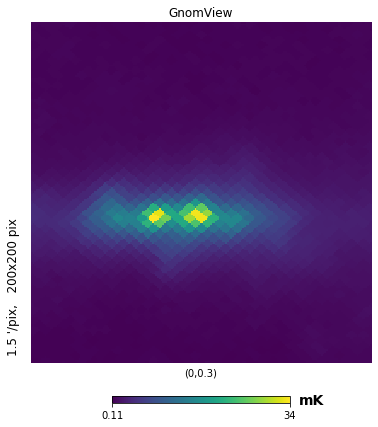

In [17]:
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

mollzoom is a powerful tool for interactive inspection of a map, it provides a mollweide projection where you can click to set the center of the adjacent gnomview panel.

mollzoom - это мощный инструмент для интерактивного просмотра карты, он обеспечивает проекцию mollweide, где вы можете щелкнуть, чтобы установить центр соседней панели gnomview.

# Masked map, partial maps
Маскированная карта, частичные карты


By convention, HEALPIX uses $-1.6375 * 10^{30}$ to mark invalid or unseen pixels. This is stored in healpy as the constant UNSEEN.

По соглашению HEALPIX использует $ -1.6375 * 10 ^ {30} $ для отметки недопустимых или невидимых пикселей. Он хранится в healpy как постоянная НЕВИДИМАЯ.

All healpy functions automatically deal with maps with UNSEEN pixels, for example mollview marks in grey those sections of a map.

Все функции healpy автоматически работают с картами с НЕВИДИМЫМИ пикселями, например, mollview помечает серым цветом те участки карты.

There is an alternative way of dealing with UNSEEN pixel based on the numpyMaskedArray class, hp.ma loads a map as a masked array, by convention the mask is 0 where the data are masked, while numpy defines data masked when the mask is True, so it is necessary to flip the mask.

Существует альтернативный способ работы с НЕВИДИМЫМ пикселем на основе класса numpyMaskedArray, hp.ma загружает карту как замаскированный массив, по соглашению маска равна 0, если данные замаскированы, а numpy определяет данные, замаскированные, когда маска имеет значение True, так что надо маску переворачивать.

In [18]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)


Filling a masked array fills in the UNSEEN value and return a standard array that can be used by mollview. compressed() instead removes all the masked pixels and returns a standard array that can be used for examples by the matplotlib hist() function:

Заполнение замаскированного массива заполняет значение UNSEEN и возвращает стандартный массив, который может использоваться mollview. compressed () вместо этого удаляет все замаскированные пиксели и возвращает стандартный массив, который может использоваться для примеров функцией matplotlib hist ():

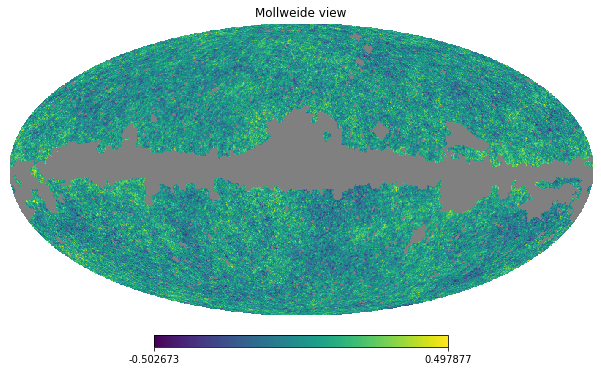

In [19]:
hp.mollview(wmap_map_I_masked.filled())

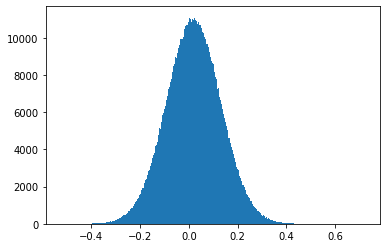

In [20]:
plt.hist(wmap_map_I_masked.compressed(), bins=1000);

# Spherical Harmonics transforms
healpy provides bindings to the C++ HEALPIX library for performing spherical harmonic transforms. hp.anafast computes the angular power spectrum of a map:

healpy предоставляет привязки к библиотеке C ++ HEALPIX для выполнения сферических гармонических преобразований. hp.anafast вычисляет угловой спектр мощности карты:

In [21]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

therefore we can plot a normalized CMB spectrum and write it to disk:

поэтому мы можем построить нормализованный спектр реликтового излучения и записать его на диск:

/home/agrippina/snap/jupyter/common/lib/python3.7/site-packages/healpy/fitsfunc.py:102: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning,


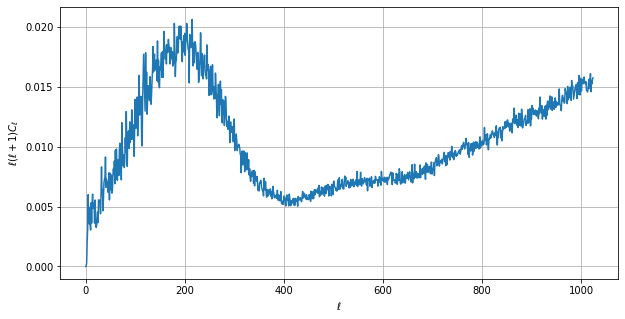

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

Gaussian beam map smoothing is provided by hp.smoothing:

Сглаживание карты гауссова луча обеспечивается hp.smoothing:

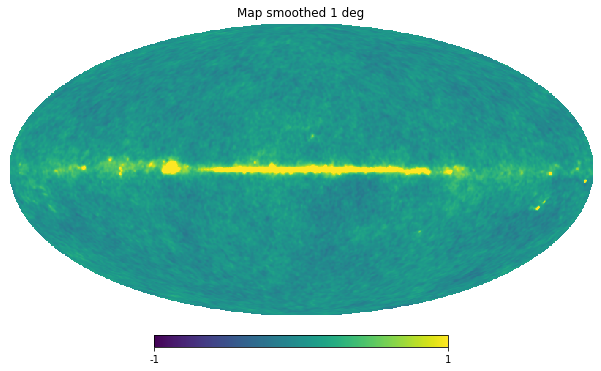

In [41]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

For more information see the <a href="https://healpix.jpl.nasa.gov/pdf/intro.pdf">HEALPix primer</a>.